## Can be applied to any machine learning algo

<font color=red><h2>It is a methodolgy applied to an existing machine learning algo most
commonly to decision trees</font></h2>

<font color ='green'><h2>Ensemble of weak learners be a strong learner 
when combined?</font></h2>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df =pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


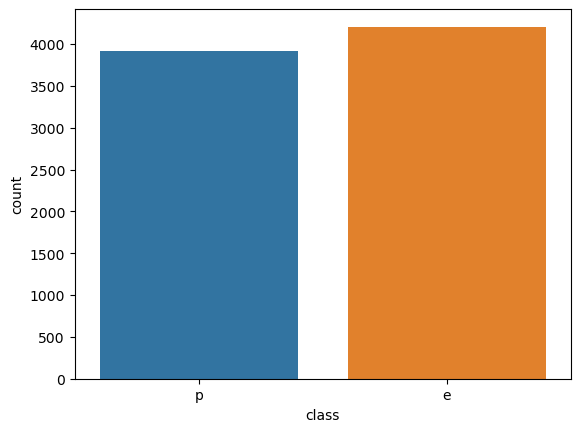

In [6]:
sns.countplot(data=df,x='class');

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
feat_uni =df.describe().transpose().reset_index().sort_values('unique')

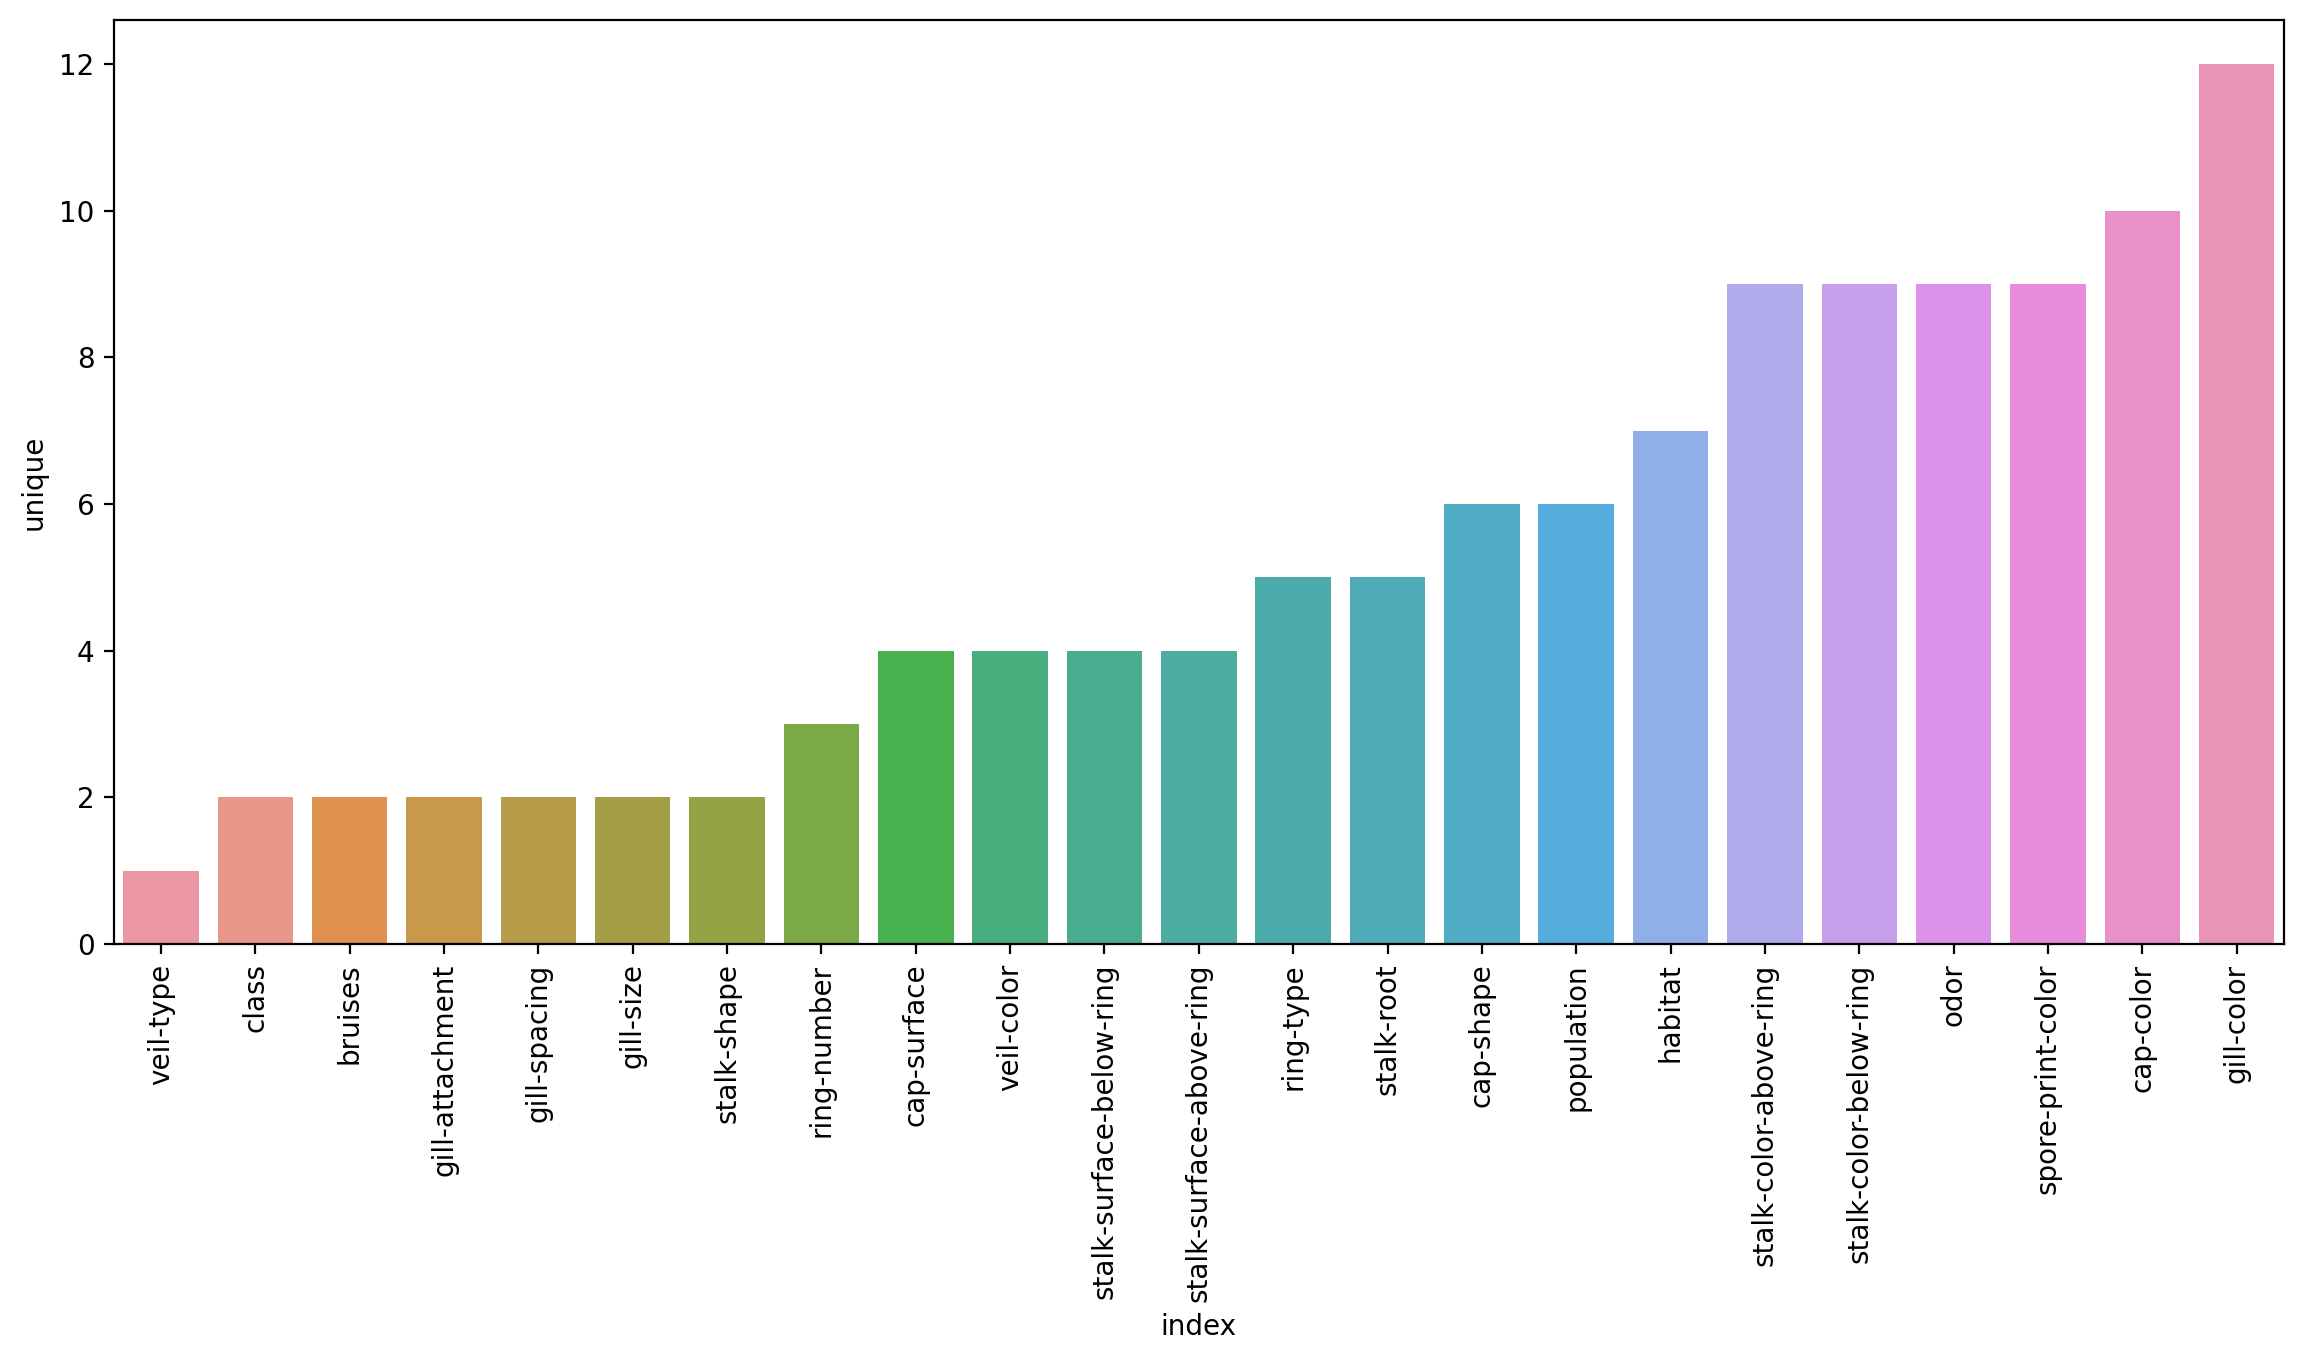

In [9]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=feat_uni,x='index',y='unique')
plt.xticks(rotation=90);

In [10]:
X = df.drop('class',axis=1)

In [11]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [12]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [13]:
X = pd.get_dummies(X,drop_first=True)

In [14]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [15]:
y =df['class']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.15, random_state=101)

In [18]:
from sklearn.ensemble import AdaBoostClassifier

In [19]:
model = AdaBoostClassifier(n_estimators=1)

In [20]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [21]:
from sklearn.metrics import classification_report,accuracy_score

In [22]:
predictions=model.predict(X_test)

In [23]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [25]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
model.feature_importances_.argmax()

22

In [27]:
X.columns[22]

'odor_n'

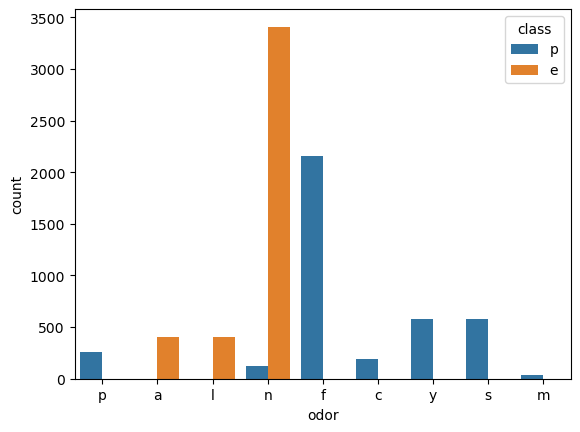

In [30]:
sns.countplot(data=df,x='odor',hue='class');

In [31]:
len(X.columns)

95

In [32]:
error_rates =[]
for n in range(1,96):
    model=AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    
    err=1-accuracy_score(y_test,preds)
    
    error_rates.append(err)

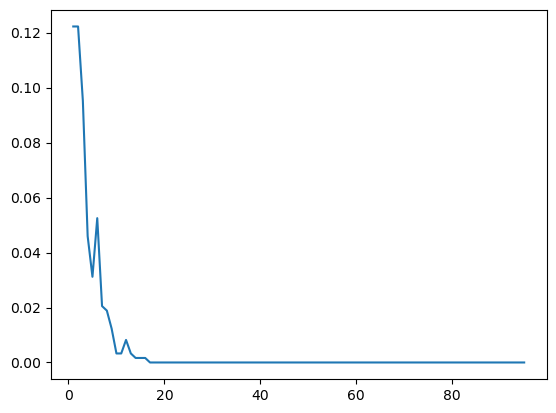

In [34]:
plt.plot(range(1,96),error_rates);

In [35]:
model

AdaBoostClassifier(n_estimators=95)

In [36]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.05263158, 0.03157895, 0.03157895,
       0.        , 0.        , 0.06315789, 0.02105263, 0.        ,
       0.        , 0.        , 0.09473684, 0.09473684, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.01052632, 0.        , 0.        , 0.        ,
       0.06315789, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06315789, 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.     

In [37]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [38]:
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [39]:
imp_feats = feats[feats['Importance']>0]
imp_feats

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


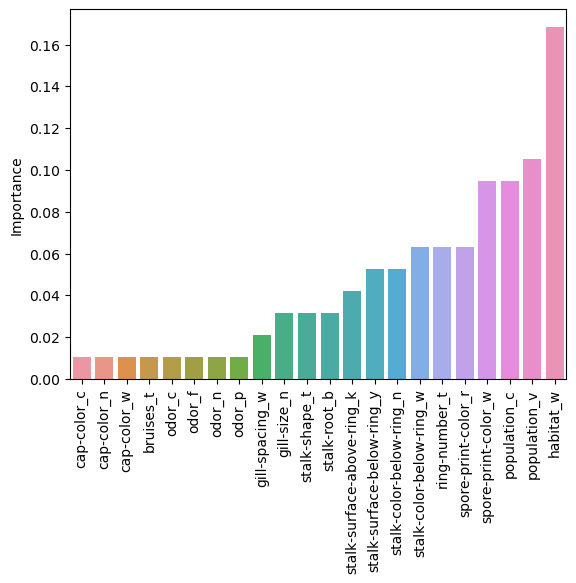

In [42]:
sns.barplot(data=imp_feats.sort_values("Importance"),x=imp_feats.index,y='Importance')
plt.xticks(rotation=90);

In [43]:
#REPEAT THE EXERCISE WITH n_estimators =18

## Gradient Boosting

### It makes use of residual error for learning.

### 1.Larger trees
### 2.Learning rate coefficient same for all weak learners.
### 3. Training of residuals of previous model.

In [44]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [45]:
X = df.drop('class',axis=1)

In [46]:
X = pd.get_dummies(X,drop_first=True)

In [47]:
y=df['class']

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=101)

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = {'n_estimators':[50,100],
             'learning_rate':[0.1,0.05,0.2],
             'max_depth':[3,4,5]}

In [54]:
gb_model = GradientBoostingClassifier()

In [55]:
grid = GridSearchCV(gb_model,param_grid)

In [56]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [58]:
from sklearn.metrics import classification_report,accuracy_score

In [59]:
predictions = grid.predict(X_test)

In [60]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [61]:
grid.best_estimator_

GradientBoostingClassifier()

In [62]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [63]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [65]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 2.95320446e-16, 0.00000000e+00, 0.00000000e+00,
       7.41476982e-17, 1.04652037e-03, 0.00000000e+00, 3.78276239e-06,
       0.00000000e+00, 2.33164663e-17, 0.00000000e+00, 1.69958435e-17,
       3.03219963e-17, 0.00000000e+00, 0.00000000e+00, 2.22085607e-08,
       2.31055039e-03, 5.33555219e-02, 1.84253604e-04, 1.41677006e-02,
       1.82499853e-02, 3.31978962e-03, 6.14744334e-01, 3.94907433e-03,
       0.00000000e+00, 0.00000000e+00, 1.66306536e-18, 1.25092906e-02,
       1.04355233e-02, 0.00000000e+00, 1.20292224e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.97764521e-18, 0.00000000e+00,
       2.15239405e-04, 0.00000000e+00, 1.36080994e-01, 4.69032068e-03,
       1.79097200e-02, 2.87695826e-03, 6.12113083e-06, 5.48883507e-06,
       1.83319493e-05, 0.00000000e+00, 4.94512970e-02, 4.14122063e-06,
       0.00000000e+00, 0.00000000e+00, 1.17280174e-04, 0.00000000e+00,
      

In [66]:
feat_import=grid.best_estimator_.feature_importances_

In [67]:
imp_feat = pd.DataFrame(index=X.columns,
                       data=feat_import,
                       columns=['Importance'])

In [69]:
imp_feat = imp_feat[imp_feat['Importance']>0.0005]

In [70]:
imp_feat

,Importance
cap-surface_g,0.001047
cap-color_y,0.002311
bruises_t,0.053356
odor_f,0.014168
odor_l,0.018250
odor_m,0.003320
odor_n,0.614744
odor_p,0.003949
gill-spacing_w,0.012509
gill-size_n,0.010436


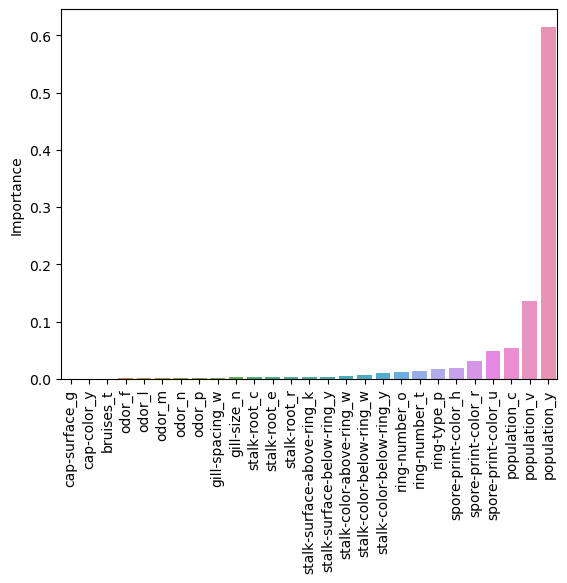

In [73]:
sns.barplot(data=imp_feat.sort_values("Importance"),x=imp_feat.index,y='Importance')
plt.xticks(rotation=90);